<a href="https://colab.research.google.com/github/fka5079/SentimentAnalysis/blob/main/ReviewsvsTestimonials_Definitions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

# Upload Dataset and Clean

In [ ]:
#Upload csv file
uploaded = files.upload()

Saving CustomerReviewsDefinition.csv to CustomerReviewsDefinition.csv


In [ ]:
# Read the data and save as a dataframe
df = pd.read_csv(io.BytesIO(uploaded['CustomerReviewsDefinition.csv']))

# Remove NaN responses
for column in df.columns:
    df = df[df[column].notna()]

print(df.shape)

(376, 2)


In [ ]:
# Remove "No response" or "na"

for column in df.columns:
    for index, row in df.iterrows():
        if "no response" in str(row[column]).lower() or "na" in str(row[column]).lower():
            df = df.drop(index)

# Calculate Sentiment Score Using VADER

In [ ]:
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,ID,Customer Reviews
0,0,I would define customer review as what other p...
1,1,"A true statement about a person, product, etc."
2,2,Someone who had either a good experience or ba...
3,3,a report stating how the appt went- including ...
4,4,I ignore them!!!!!


In [ ]:
# Run the polarity score on the entire dataset

res = {} #create dictionary to store sentiment scores

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Customer Reviews']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/334 [00:00<?, ?it/s]

In [ ]:
# Save sentiment scores as dataframe and merge to original df
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')

In [ ]:
#Check dataset so far with sentiment scores
vaders.head()

,ID,neg,neu,pos,compound,Customer Reviews
0,0,0.000,1.000,0.000,0.0000,I would define customer review as what other p...
1,1,0.000,0.641,0.359,0.4215,"A true statement about a person, product, etc."
2,2,0.218,0.648,0.134,-0.2023,Someone who had either a good experience or ba...
3,3,0.000,0.821,0.179,0.6124,a report stating how the appt went- including ...
4,4,0.786,0.214,0.000,-0.5673,I ignore them!!!!!


# Plot Sentiment Scores with Median and Mean

In [ ]:
# Plot Negative sentiments with median and average

neg_col = vaders['neg']

# compute median and average of `neg_col`
neg_median = neg_col.median()
print(neg_median)
neg_mean = neg_col.mean()
print(neg_mean)

# create scatter plot of `neg_col`
plt.scatter(range(len(neg_col)), neg_col)

# add line for median - red
plt.axhline(y=neg_median, color='r', linestyle='-')

# add line for mean - blue
plt.axhline(y=neg_mean, color='b', linestyle='-')

plt.title('Negative Sentiment Scores')
plt.xlabel('Responses')
plt.ylabel('Negative Sentiment Scores')

# show plot
plt.show()


In [ ]:
# Plot Positive sentiments with median and average

pos_col = vaders['pos']

# compute median and average of `pos_col`
pos_median = pos_col.median()
pos_mean = pos_col.mean()

# create scatter plot of `pos_col`
plt.scatter(range(len(pos_col)), pos_col)

# add line for median
plt.axhline(y=pos_median, color='r', linestyle='-')

# add line for mean
plt.axhline(y=pos_mean, color='b', linestyle='-')

plt.title('Positive Sentiment Scores')
plt.xlabel('Responses')
plt.ylabel('Positive Sentiment Scores')

# show plot
plt.show()

In [ ]:
# Plot Neutral sentiments with median and average

neu_col = vaders['neu']

# compute median and average of `neu_col`
neu_median = neu_col.median()
neu_mean = neu_col.mean()
print(neu_median)
print(neu_mean)

# create scatter plot of `neu_col`
plt.scatter(range(len(neu_col)), neu_col)

# add line for median
plt.axhline(y=neu_median, color='r', linestyle='-')

# add line for mean
plt.axhline(y=neu_mean, color='b', linestyle='-')

plt.title('Neutral Sentiment Scores')
plt.xlabel('Responses')
plt.ylabel('Neutral Sentiment Scores')

# show plot
plt.show()

0.0
0.12342784431137727


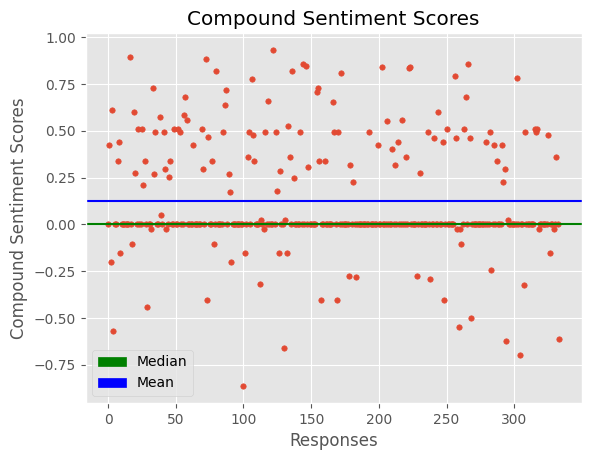

In [ ]:
# Plot Compound sentiment scores with median and average

comp_col = vaders['compound']

# compute median and average of `comp_col`
comp_median = comp_col.median()
comp_mean = comp_col.mean()
print(comp_median)
print(comp_mean)

# create scatter plot of `comp_col`
plt.scatter(range(len(comp_col)), comp_col, s=15)

# add line for median
plt.axhline(y=comp_median, color='g', linestyle='-')

# add line for mean
plt.axhline(y=comp_mean, color='b', linestyle='-')

# Add graph and axis titles
plt.title('Compound Sentiment Scores')
plt.xlabel('Responses')
plt.ylabel('Compound Sentiment Scores')

# Add legend
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='green', label='Median')
blue_patch = mpatches.Patch(color='blue', label='Mean')

plt.legend(handles=[red_patch, blue_patch])

# show plot
plt.show()

# Sentiment Score by Topic

## "Experience"

In [ ]:
# Sentiment Scores by Topic - Experience

# create an empty dataframe to store the qualifying rows
exp = pd.DataFrame(columns=vaders.columns)

# loop through each row in the `vaders` dataframe
for index, row in vaders.iterrows():
    # check if "experience" is present in the "Customer Reviews" column, ignoring case
    if "experience" in str(row["Customer Reviews"]).lower():
        # add the row to the `exp` dataframe
        exp = pd.concat([exp, row.to_frame().transpose()])

# reset the index of the `exp` dataframe
exp.reset_index(drop=True, inplace=True)

exp.head()

0.0
0.12005841584158414


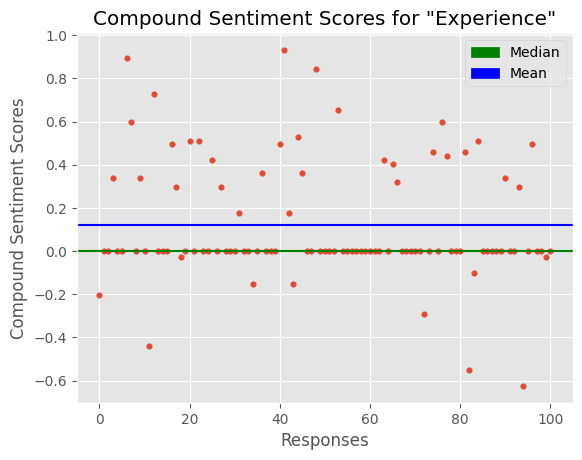

In [ ]:
# Plot Scatter plot with median and mode for "Experience"
exp_comp_col = exp['compound']

# compute median and average of `exp_comp_col`
exp_comp_median = exp_comp_col.median()
exp_comp_mean = exp_comp_col.mean()
print(exp_comp_median)
print(exp_comp_mean)

# create scatter plot of `comp_col`
plt.scatter(range(len(exp_comp_col)), exp_comp_col, s=15)

# add line for median
plt.axhline(y=exp_comp_median, color='g', linestyle='-')

# add line for mean
plt.axhline(y=exp_comp_mean, color='b', linestyle='-')

# Add graph and axis titles
plt.title('Compound Sentiment Scores for "Experience"')
plt.xlabel('Responses')
plt.ylabel('Compound Sentiment Scores')

# Add legend
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='green', label='Median')
blue_patch = mpatches.Patch(color='blue', label='Mean')

plt.legend(handles=[red_patch, blue_patch])

# show plot
plt.show()

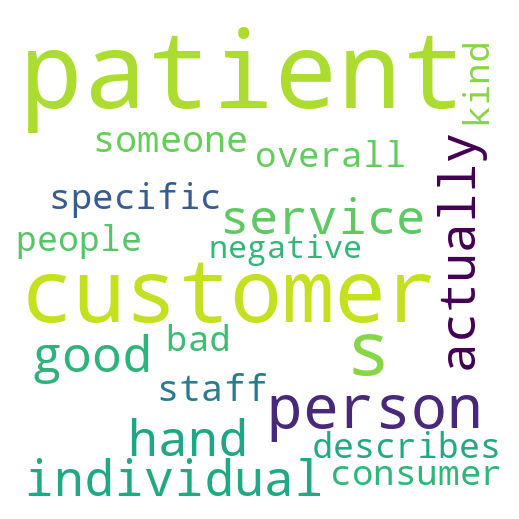

In [ ]:
# Extracting words used before "Experience" and creating a word cloud

# create a new column called "Before"
exp["Before"] = ""

# loop through each row in the `exp` dataframe
for index, row in exp.iterrows():
    # extract the "Customer Reviews" column and convert to lowercase
    text = str(row["Customer Reviews"]).lower()
    
    # find the index of the word "experience"
    exp_index = text.find("experience")
    
    # if "experience" is not found, set "Before" to "Not Found"
    if exp_index == -1:
        exp.at[index, "Before"] = "Not Found"
    else:
        # find the index of the last whitespace character before "experience"
        whitespace_index = text[:exp_index].rstrip().rfind(" ")
        
        # extract the two words before "experience"
        if whitespace_index != -1:
            before_words = text[whitespace_index:exp_index].strip()
        else:
            before_words = text[:exp_index].strip()
        
        # set the "Before" column to the extracted words
        exp.at[index, "Before"] = before_words


from wordcloud import WordCloud

# extract the "Before" column
before_text = " ".join(exp["Before"].tolist())

# create a word cloud object
wordcloud = WordCloud(width=500, height=500, background_color="white").generate(before_text)

# plot the word cloud
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

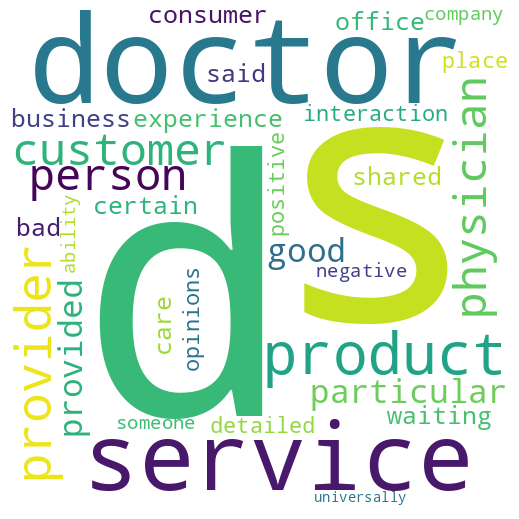

In [ ]:
# Extracting words used after "Experience" and creating a word cloud

# create a new column called "After"
exp["After"] = ""

# loop through each row in the dataframe
for i, row in exp.iterrows():
    # get the "Customer Reviews" text for this row
    review = row["Customer Reviews"]
    # find the index of the word "experience" in the review
    exp_index = review.lower().find("experience")
    if exp_index >= 0:
        # if "experience" is found, get the three words after it
        after_words = review[exp_index+len("experience"):].strip().split()[:3]
        # join the three words into a single string
        after_string = " ".join(after_words)
        # update the "After" column with the string
        exp.at[i, "After"] = after_string

# Plot After words as a word cloud
# extract the "After" column
after_text = " ".join(exp["After"].tolist())

# create a word cloud object
wordcloud = WordCloud(width=500, height=500, background_color="white").generate(after_text)

# plot the word cloud
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

## "Opinion"

In [ ]:
# Sentiment Scores by Topic - Opinion

# create an empty dataframe to store the qualifying rows
opi = pd.DataFrame(columns=vaders.columns)

# loop through each row in the `vaders` dataframe
for index, row in vaders.iterrows():
    # check if "opinion" is present in the "Customer Reviews" column, ignoring case
    if "opinion" in str(row["Customer Reviews"]).lower():
        # add the row to the `opi` dataframe
        opi = pd.concat([opi, row.to_frame().transpose()])

# reset the index of the `opi` dataframe
opi.reset_index(drop=True, inplace=True)

opi.head()

,ID,neg,neu,pos,compound,Customer Reviews
0,26,0.0,0.837,0.163,0.5106,Their honest opinion on the services they were...
1,27,0.091,0.807,0.102,0.2081,"Honest, open opinion about the doctor ... not,..."
2,50,0.0,1.0,0.0,0.0,An opinion of a service or product.
3,52,0.0,0.864,0.136,0.5106,A written summary of a customer's experience w...
4,56,0.0,0.798,0.202,0.5106,An honest opinion from a person who has actual...


0.10405
0.21762


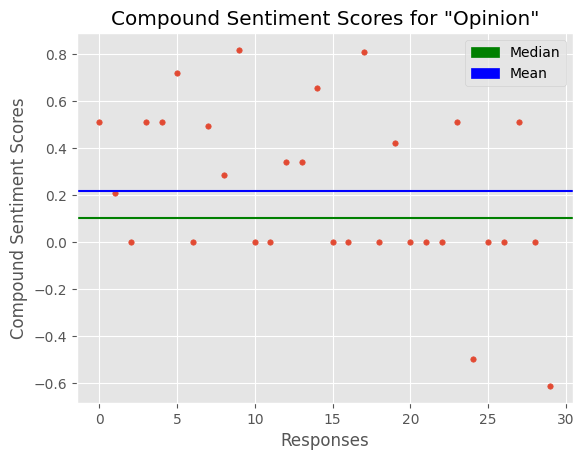

In [ ]:
# Plot Scatter plot with median and mode for "Opinion"
opi_comp_col = opi['compound']

# compute median and average of `exp_comp_col`
opi_comp_median = opi_comp_col.median()
opi_comp_mean = opi_comp_col.mean()
print(opi_comp_median)
print(opi_comp_mean)

# create scatter plot of `comp_col`
plt.scatter(range(len(opi_comp_col)), opi_comp_col, s=15)

# add line for median
plt.axhline(y=opi_comp_median, color='g', linestyle='-')

# add line for mean
plt.axhline(y=opi_comp_mean, color='b', linestyle='-')

# Add graph and axis titles
plt.title('Compound Sentiment Scores for "Opinion"')
plt.xlabel('Responses')
plt.ylabel('Compound Sentiment Scores')

# Add legend
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='green', label='Median')
blue_patch = mpatches.Patch(color='blue', label='Mean')

plt.legend(handles=[red_patch, blue_patch])

# show plot
plt.show()

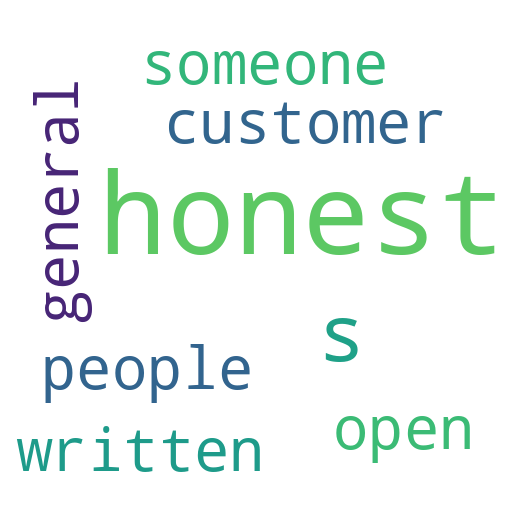

In [ ]:
# Extracting words used before "Opinion" and creating a word cloud

# create a new column called "Before"
opi["Before"] = ""

# loop through each row in the `opi` dataframe
for index, row in opi.iterrows():
    # extract the "Customer Reviews" column and convert to lowercase
    text = str(row["Customer Reviews"]).lower()
    
    # find the index of the word "opinion"
    opi_index = text.find("opinion")
    
    # if "opinion" is not found, set "Before" to "Not Found"
    if opi_index == -1:
        opi.at[index, "Before"] = "Not Found"
    else:
        # find the index of the last whitespace character before "opinion"
        whitespace_index = text[:opi_index].rstrip().rfind(" ")
        
        # extract the two words before "opinion"
        if whitespace_index != -1:
            before_words = text[whitespace_index:opi_index].strip()
        else:
            before_words = text[:opi_index].strip()
        
        # set the "Before" column to the extracted words
        opi.at[index, "Before"] = before_words


from wordcloud import WordCloud

# extract the "Before" column
before_text = " ".join(opi["Before"].tolist())

# create a word cloud object
wordcloud = WordCloud(width=500, height=500, background_color="white").generate(before_text)

# plot the word cloud
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

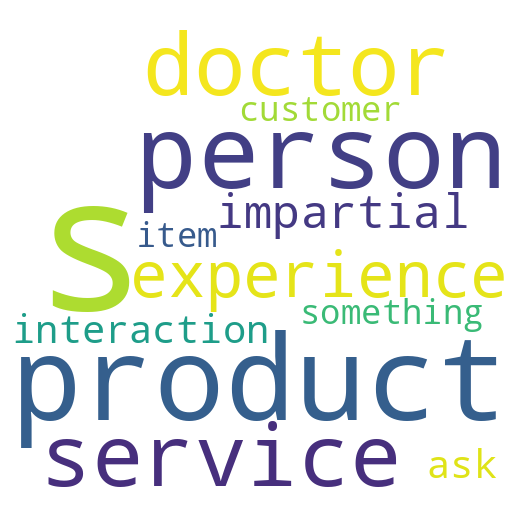

In [ ]:
# Extracting words used after "opinion" and creating a word cloud

# create a new column called "After"
opi["After"] = ""

# loop through each row in the dataframe
for i, row in opi.iterrows():
    # get the "Customer Reviews" text for this row
    review = row["Customer Reviews"]
    # find the index of the word "opinion" in the review
    opi_index = review.lower().find("opinion")
    if opi_index >= 0:
        # if "opinion" is found, get the three words after it
        after_words = review[opi_index+len("opinion"):].strip().split()[:3]
        # join the three words into a single string
        after_string = " ".join(after_words)
        # update the "After" column with the string
        opi.at[i, "After"] = after_string

# Plot After words as a word cloud
# extract the "After" column
after_text = " ".join(opi["After"].tolist())

# create a word cloud object
wordcloud = WordCloud(width=500, height=500, background_color="white").generate(after_text)

# plot the word cloud
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

## "Comment"

In [ ]:
# Sentiment Scores by Topic - comment

# create an empty dataframe to store the qualifying rows
comm = pd.DataFrame(columns=vaders.columns)

# loop through each row in the `vaders` dataframe
for index, row in vaders.iterrows():
    # check if "comment" is present in the "Customer Reviews" column, ignoring case
    if "comment" in str(row["Customer Reviews"]).lower():
        # add the row to the `comm` dataframe
        comm = pd.concat([comm, row.to_frame().transpose()])

# reset the index of the `comm` dataframe
comm.reset_index(drop=True, inplace=True)

comm.head()

,ID,neg,neu,pos,compound,Customer Reviews
0,19,0.0,0.811,0.189,0.5994,Comments made for focused on their experience ...
1,58,0.0,1.0,0.0,0.0,A solicited comment by a customer
2,65,0.0,1.0,0.0,0.0,Comments made by a patient or family member
3,68,0.0,1.0,0.0,0.0,By reading comments instead of stars
4,105,0.0,1.0,0.0,0.0,A comment left by an actual patient of the Doc...


0.0
0.14376071428571427


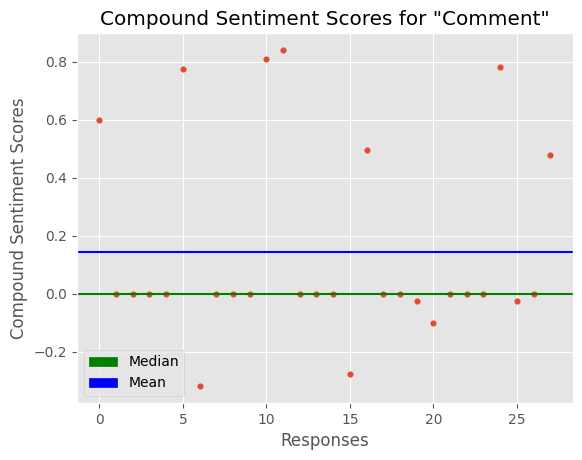

In [ ]:
# Plot Scatter plot with median and mode for "Comment"
comm_comp_col = comm['compound']

# compute median and average of `exp_comp_col`
comm_comp_median = comm_comp_col.median()
comm_comp_mean = comm_comp_col.mean()
print(comm_comp_median)
print(comm_comp_mean)

# create scatter plot of `comp_col`
plt.scatter(range(len(comm_comp_col)), comm_comp_col, s=15)

# add line for median
plt.axhline(y=comm_comp_median, color='g', linestyle='-')

# add line for mean
plt.axhline(y=comm_comp_mean, color='b', linestyle='-')

# Add graph and axis titles
plt.title('Compound Sentiment Scores for "Comment"')
plt.xlabel('Responses')
plt.ylabel('Compound Sentiment Scores')

# Add legend
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='green', label='Median')
blue_patch = mpatches.Patch(color='blue', label='Mean')

plt.legend(handles=[red_patch, blue_patch])

# show plot
plt.show()

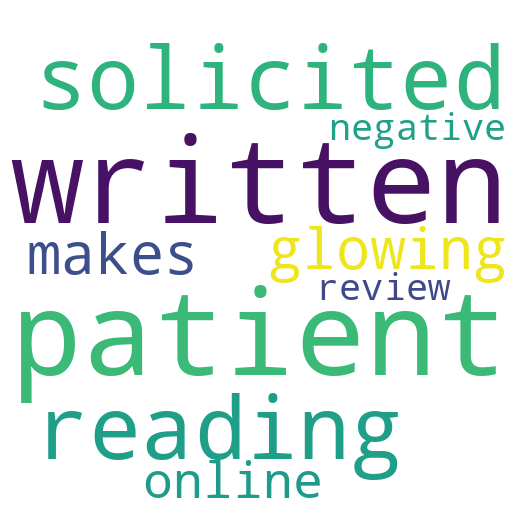

In [ ]:
# Extracting words used before "comment" and creating a word cloud

# create a new column called "Before"
comm["Before"] = ""

# loop through each row in the `comm` dataframe
for index, row in comm.iterrows():
    # extract the "Customer Reviews" column and convert to lowercase
    text = str(row["Customer Reviews"]).lower()
    
    # find the index of the word "comment"
    comm_index = text.find("comment")
    
    # if "comment" is not found, set "Before" to "Not Found"
    if comm_index == -1:
        comm.at[index, "Before"] = "Not Found"
    else:
        # find the index of the last whitespace character before "comment"
        whitespace_index = text[:comm_index].rstrip().rfind(" ")
        
        # extract the two words before "comment"
        if whitespace_index != -1:
            before_words = text[whitespace_index:comm_index].strip()
        else:
            before_words = text[:comm_index].strip()
        
        # set the "Before" column to the extracted words
        comm.at[index, "Before"] = before_words


from wordcloud import WordCloud

# extract the "Before" column
before_text = " ".join(comm["Before"].tolist())

# create a word cloud object
wordcloud = WordCloud(width=500, height=500, background_color="white").generate(before_text)

# plot the word cloud
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

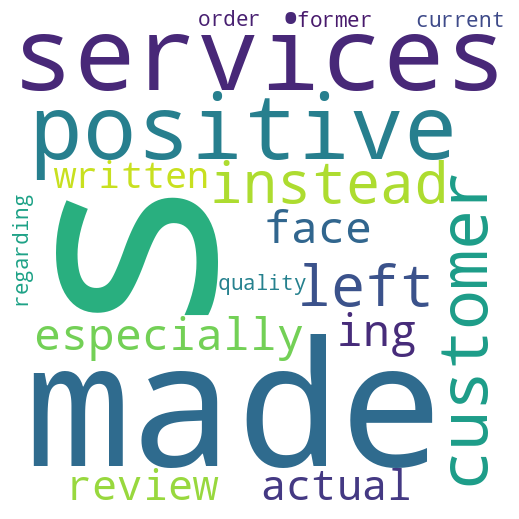

In [ ]:
# Extracting words used after "comment" and creating a word cloud

# create a new column called "After"
comm["After"] = ""

# loop through each row in the dataframe
for i, row in comm.iterrows():
    # get the "Customer Reviews" text for this row
    review = row["Customer Reviews"]
    # find the index of the word "comment" in the review
    comm_index = review.lower().find("comment")
    if comm_index >= 0:
        # if "comment" is found, get the three words after it
        after_words = review[comm_index+len("comment"):].strip().split()[:3]
        # join the three words into a single string
        after_string = " ".join(after_words)
        # update the "After" column with the string
        comm.at[i, "After"] = after_string

# Plot After words as a word cloud
# extract the "After" column
after_text = " ".join(comm["After"].tolist())

# create a word cloud object
wordcloud = WordCloud(width=500, height=500, background_color="white").generate(after_text)

# plot the word cloud
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()